In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)
fruits = pd.read_table('fruits.txt')
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [2]:
print(fruits.shape)

(59, 7)


In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [4]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [5]:
counts = _

<Axes: xlabel='fruit_name'>

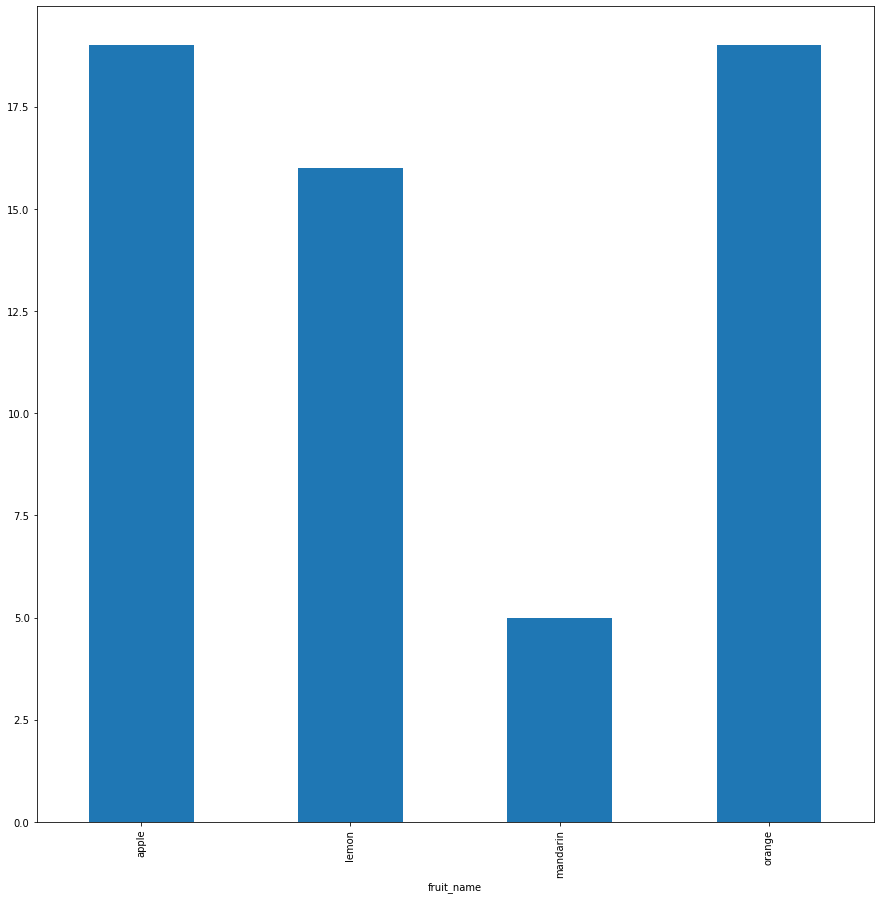

In [6]:
counts.plot(kind='bar')

In [7]:
label_removed = fruits.drop('fruit_label', axis=1)

In [8]:
label_removed.head()

fruit_name fruit_subtype  mass  width  height  color_score
0      apple  granny_smith   192    8.4     7.3         0.55
1      apple  granny_smith   180    8.0     6.8         0.59
2      apple  granny_smith   176    7.4     7.2         0.60
3   mandarin      mandarin    86    6.2     4.7         0.80
4   mandarin      mandarin    84    6.0     4.6         0.79

mass              Axes(0.125,0.536818;0.352273x0.343182)
width          Axes(0.547727,0.536818;0.352273x0.343182)
height               Axes(0.125,0.125;0.352273x0.343182)
color_score       Axes(0.547727,0.125;0.352273x0.343182)
dtype: object

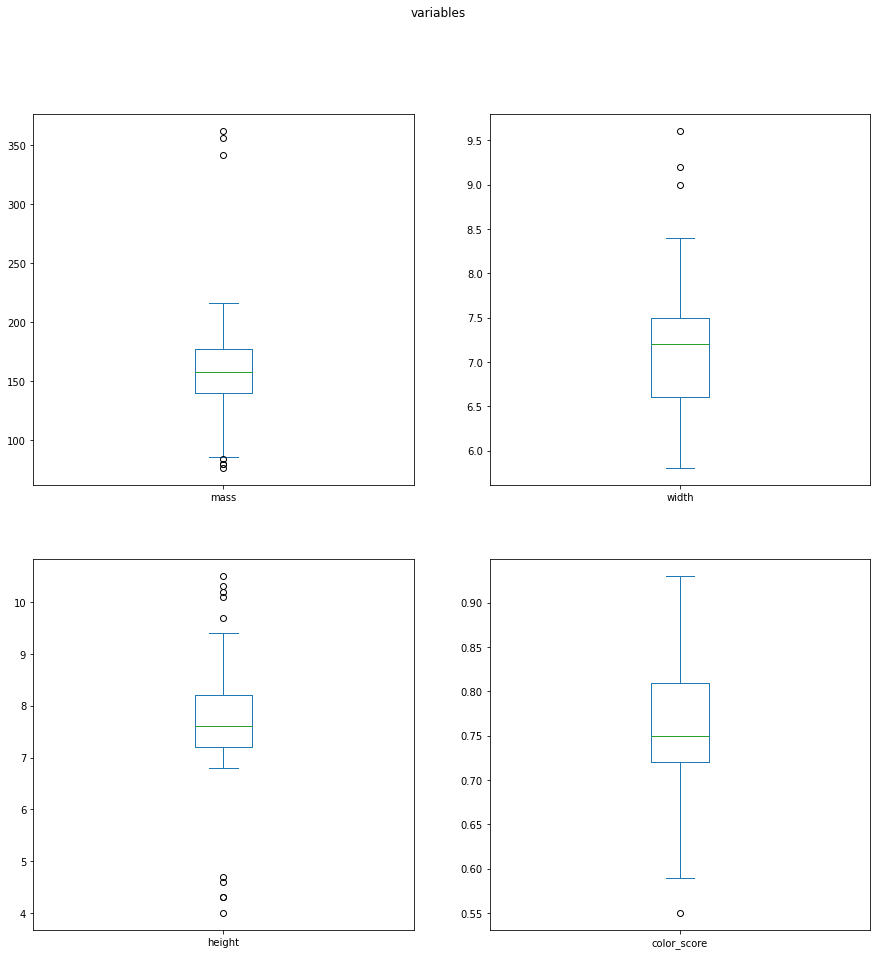

In [9]:
label_removed.plot(kind='box', subplots=True, layout=(2,2), title='variables')
# plt.savefig('fruits_box')
# plt.show()

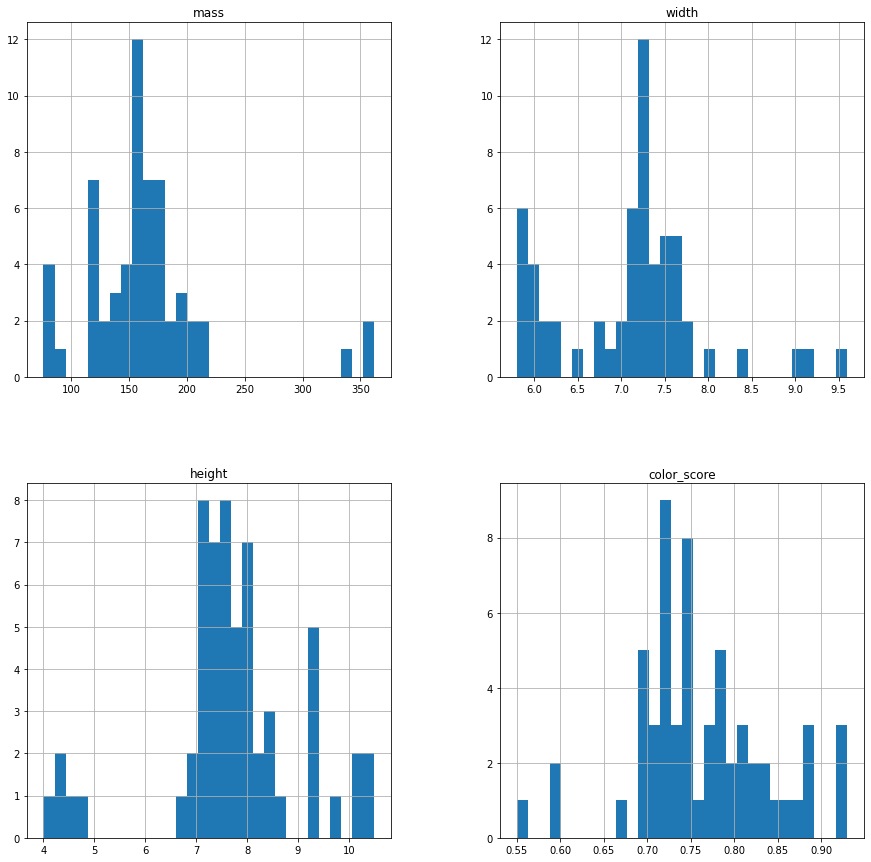

In [10]:
label_removed.hist(bins=30)
plt.savefig('fruits_hist')
plt.show()

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_36403/663915837.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


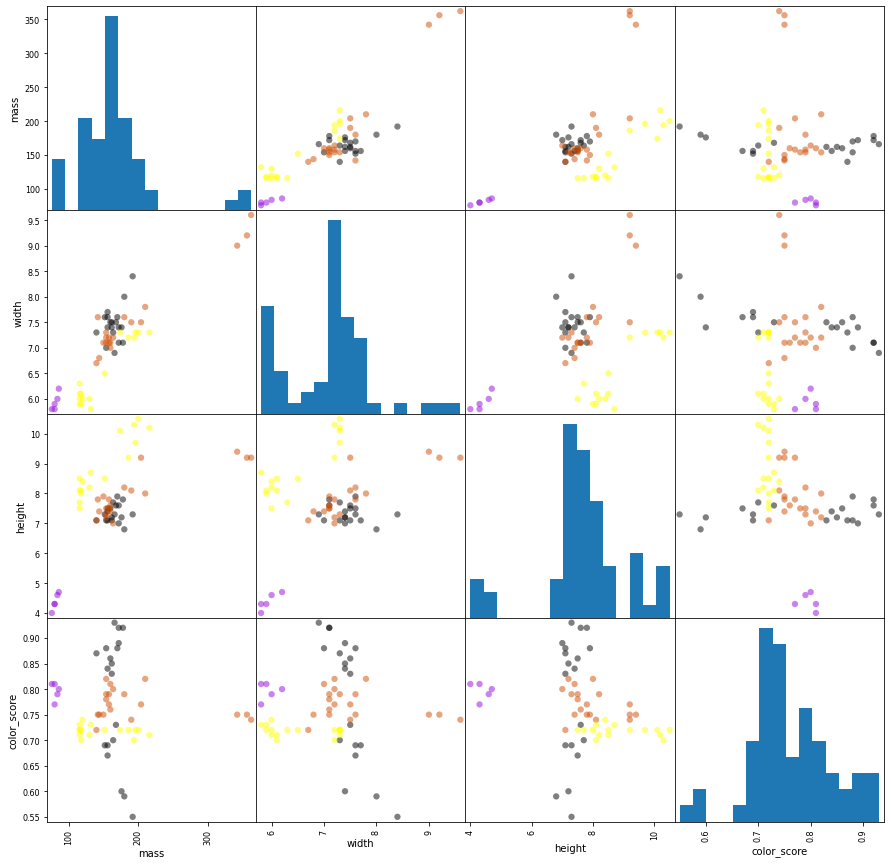

In [11]:
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, cmap = cmap)

plt.savefig('fruits_scatter_matrix')
plt.show()

In [12]:
X.head()

mass  width  height  color_score
0   192    8.4     7.3         0.55
1   180    8.0     6.8         0.59
2   176    7.4     7.2         0.60
3    86    6.2     4.7         0.80
4    84    6.0     4.6         0.79

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[:5]

array([[0.27857143, 0.41176471, 0.49230769, 0.72972973],
       [0.35      , 0.44117647, 0.93846154, 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.27142857, 0.52941176, 0.50769231, 0.37837838],
       [0.31428571, 0.41176471, 0.46153846, 0.67567568]])

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

score_on_train = logreg.score(X_train, y_train)
score_on_test = logreg.score(X_test, y_test)

print(f'Accuracy on training set: {score_on_train:.2f}')
print(f'Accuracy on test set: {score_on_test:.2f}')

Accuracy on training set: 0.75
Accuracy on test set: 0.47


In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


print(f'Accuracy on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {clf.score(X_test, y_test):.2f}')


Accuracy on training set: 1.00
Accuracy on test set: 0.87


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f'Accuracy on training set: {knn.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {knn.score(X_test, y_test):.2f}')


Accuracy on training set: 0.95
Accuracy on test set: 1.00


In [18]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print(f'Accuracy on training set: {svm.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {svm.score(X_test, y_test):.2f}')


Accuracy on training set: 0.91
Accuracy on test set: 0.80


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



([<matplotlib.axis.XTick at 0x2829c4ee0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

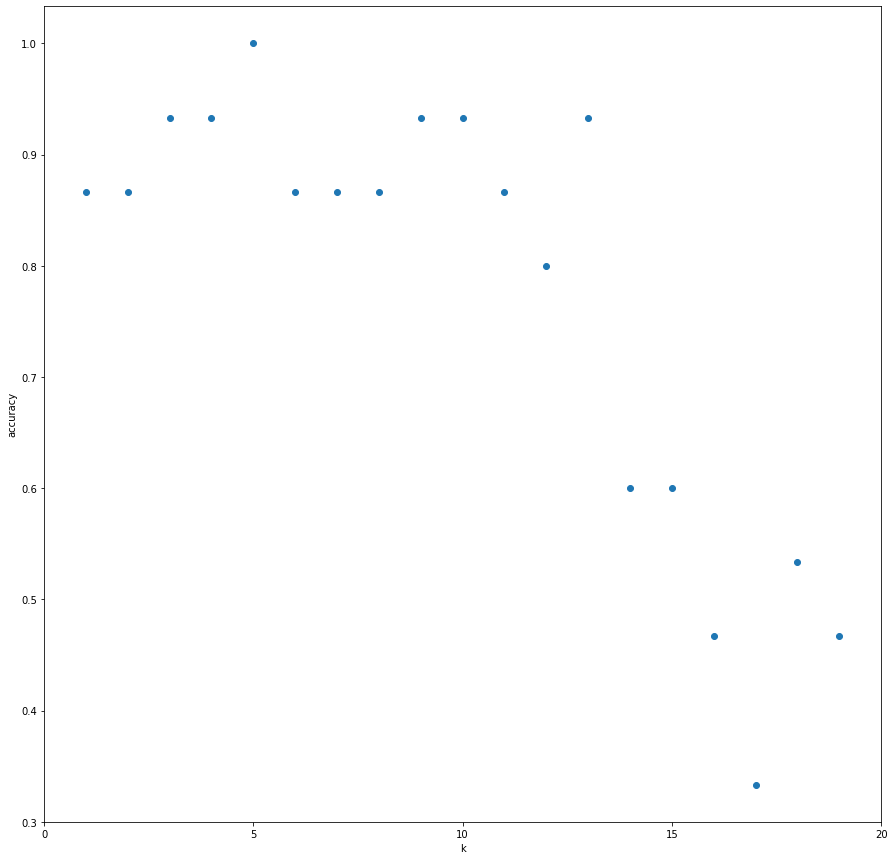

In [20]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])